## Working with A5 in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/03_a5.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/03_a5.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/03_a5.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/03_a5.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgrid
Uncomment the following line to install [vgrid](https://pypi.org/project/vgrid/).

In [1]:
# %pip install vgrid --upgrade

### latlon2a5

In [2]:
from vgrid.conversion.latlon2dggs import latlon2a5

lat = 10.775276
lon = 106.706797
res = 4
a5_hex = latlon2a5(lat, lon, res)
a5_hex

'7a38000000000000'

### A5 to Polygon

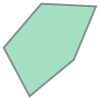

In [4]:
from vgrid.conversion.dggs2geo.a52geo import a52geo
# options = {"segments": 100, "closed_ring": True}
a5_geo = a52geo(a5_hex)
a5_geo

### A5 to GeoJSON        

In [2]:
from vgrid.conversion.dggs2geo.a52geo import a52geojson
import json
options = {"segments": 100, "closed_ring": True}
a5_geojson = a52geojson(a5_hex, options)
# a5_geojson


### Vector to A5

Processing features: 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


<Axes: >

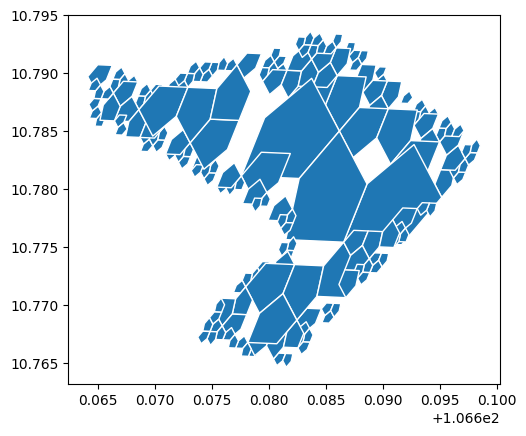

In [1]:
from vgrid.conversion.vector2dggs.vector2a5 import vector2a5

file_path = ("https://raw.githubusercontent.com/opengeoshub/vopendata/main/shape/polygon2.geojson")
options = {"segments": 'auto'}
vector_to_a5 = vector2a5(file_path, compact=True,  predicate = "intersect", topology= False, resolution=16, 
                        include_properties=False, output_format="gpd", options=options)
# Visualize vector_to_a5
vector_to_a5.plot(edgecolor="white")

### A5 Compact

<Axes: >

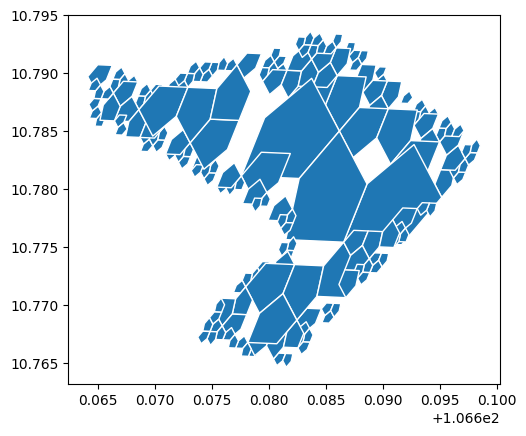

In [7]:
from vgrid.conversion.dggscompact.a5compact import a5compact

a5_compacted = a5compact(vector_to_a5, a5_hex="a5", output_format="gpd", options=options)
a5_compacted.plot(edgecolor="white")

### A5 Expand

<Axes: >

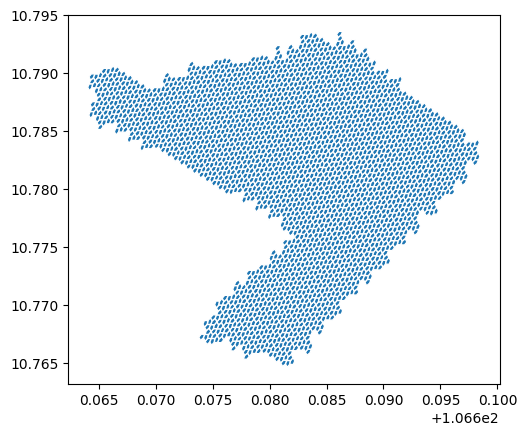

In [8]:
from vgrid.conversion.dggscompact.a5compact import a5expand

a5_expanded = a5expand(vector_to_a5, resolution=17, output_format="gpd")
a5_expanded.plot(edgecolor="white")

### A5 Binning

Generating A5 DGGS: 100%|██████████| 945/945 [00:00<00:00, 1717.63 cells/s]


<Axes: >

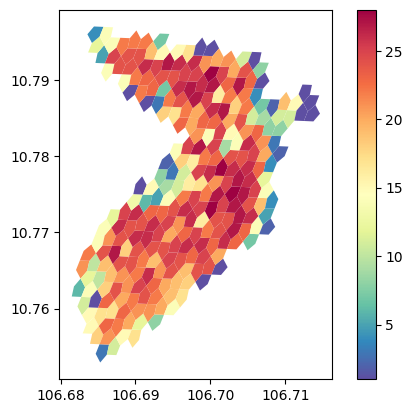

In [9]:
from vgrid.binning.a5bin import a5bin
file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/csv/dist1_pois.csv"
)
stats = "variety"
options = {"segments": 'auto'}

a5_bin = a5bin(file_path, resolution=15, stats=stats, 
                numeric_field="confidence",
                # category="category",
                output_format="gpd",
                options=options)

a5_bin.plot(
    column=stats,        # numeric column to base the colors on
    cmap='Spectral_r',        # color scheme (matplotlib colormap)
    legend=True,  
    linewidth=0.2          # boundary width (optional)
)

### Raster to A5

#### Download and open raster

WARNING [rasterio._env:368  open()] CPLE_AppDefined in PROJ: proj_create_from_database: Cannot find proj.db


rgb.tif already exists. Skip downloading. Set overwrite=True to overwrite.
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 240, 'height': 147, 'count': 3, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(2.6640125000199077e-06, 0.0, 106.708118755,
       0.0, -2.6640136054383103e-06, 10.812568272)}


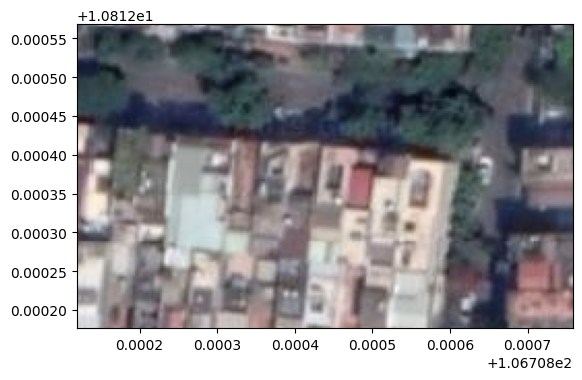

<Axes: >

In [10]:
from vgrid.utils.io import download_file
import rasterio
from rasterio.plot import show

raster_url = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/raster/rgb.tif"
)
raster_file = download_file(raster_url)
src = rasterio.open(raster_file, 'r')
print(src.meta)
show(src)

#### Convert raster to A5

In [11]:
# %pip install folium

In [12]:
# from vgrid.conversion.raster2dggs.raster2a5 import raster2a5
# options = {"segments": 'auto'}

# raster_to_a5 =  raster2a5(raster_file, resolution=23, output_format="gpd", options=options)
# # Visualize raster_to_a5
# import folium

# m = folium.Map(tiles="CartoDB positron", max_zoom=28)

# a5_layer = folium.GeoJson(
#     raster_to_a5,
#     style_function=lambda x: {
#         "fillColor": f"rgb({x['properties']['band_1']}, {x['properties']['band_2']}, {x['properties']['band_3']})",
#         "fillOpacity": 1,
#         "color": "black",
#         "weight": 0.5,
#     },
#     popup=folium.GeoJsonPopup(
#         fields=["a5", "resolution", "band_1", "band_2", "band_3", "cell_area"],
#         aliases=["A5 Hex", "Resolution", "Band 1", "Band 2", "Band 3", "Area (m²)"],
#         style="""
#             background-color: white;
#             border: 2px solid black;
#             border-radius: 3px;
#             box-shadow: 3px;
#         """,
#     ),
# ).add_to(m)

# m.fit_bounds(a5_layer.get_bounds())

# # Display the map
# m

### A5 Generator

In [13]:
from vgrid.generator.a5grid import a5grid
options = {"segments": 100}
# options = {"segments": 'auto'}

a5_grid = a5grid(resolution=2,output_format="gpd", options=options, split_antimeridian=True)
# a5_grid.to_file("a5_grid.geojson", driver="GeoJSON")
# a5_grid = a5grid(resolution=16,bbox=[106.699007, 10.762811, 106.717674, 10.778649],output_format="gpd")  
# a5_grid.to_crs('proj=moll').plot(edgecolor='white')
a5_grid["cell_area"].agg(["min", "max", "mean", "median", "std"])

Generating A5 DGGS:   0%|          | 0/648 [00:00<?, ? cells/s]

Generating A5 DGGS:  78%|███████▊  | 504/648 [00:09<00:03, 38.60 cells/s]D:\Github\vgrid\vgrid\utils\antimeridian\_implementation.py:594: FixWindingWarning: The exterior ring of this shape is wound clockwise. Since this is a common error in real-world geometries, this package is reversing the exterior coordinates of the input shape before running its algorithm. If you know that your input shape is correct (i.e. if your data encompasses both poles), pass `fix_winding=False`.
  FixWindingWarning.warn()
Generating A5 DGGS: 100%|██████████| 648/648 [00:13<00:00, 49.05 cells/s]


min       2.125243e+12
max       2.125307e+12
mean      2.125273e+12
median    2.125273e+12
std       4.537837e+06
Name: cell_area, dtype: float64

### A5 Inspect

Generating A5 DGGS: 100%|██████████| 10368/10368 [00:09<00:00, 1062.28 cells/s]


<Axes: >

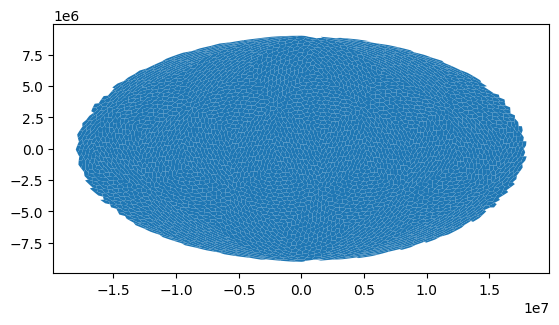

In [10]:
from vgrid.stats.a5stats import a5inspect
resolution = 4
options = {"segments": 'auto'}
a5_inspect = a5inspect(resolution, options, split_antimeridian=False)
a5_inspect = a5_inspect[a5_inspect['crossed'] == False]
a5_inspect.to_crs('proj=moll').plot()

### A5 Normalized Area Histogram

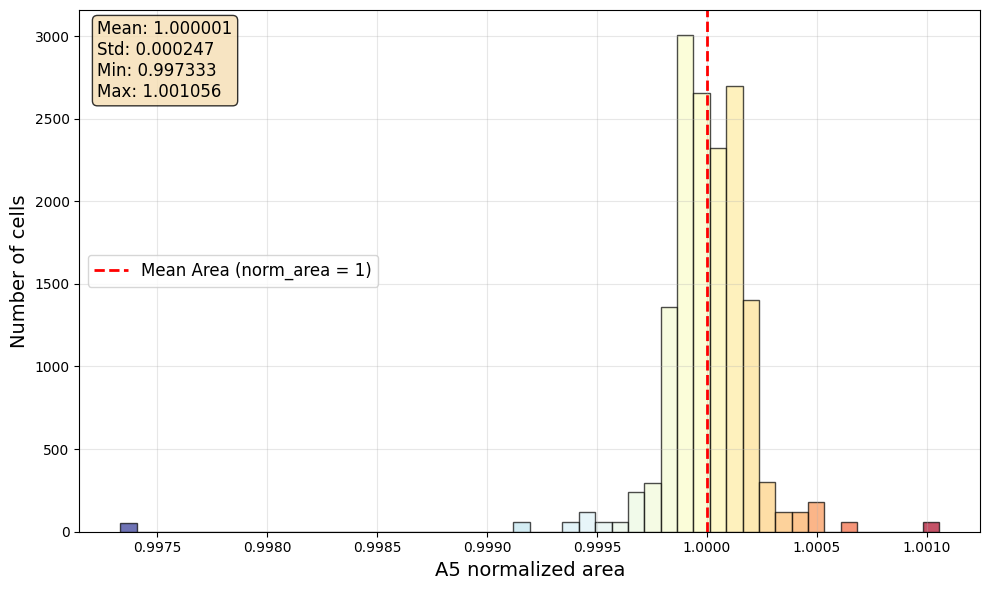

In [15]:
from vgrid.stats.a5stats import a5_norm_area_hist
a5_norm_area_hist(a5_inspect)

### Distribution of A5 Area Distortions

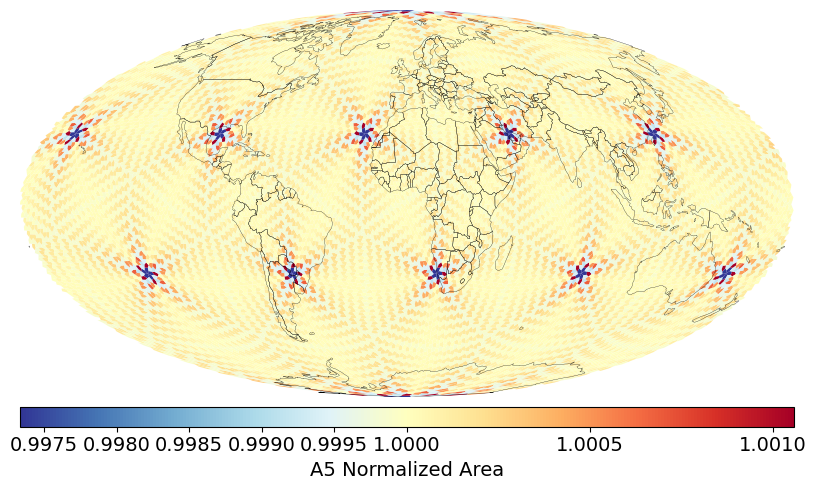

In [16]:
from vgrid.stats.a5stats import a5_norm_area
a5_norm_area(a5_inspect)

### A5 IPQ Compactness Histogram

Isoperimetric Inequality (IPQ) Compactness (suggested by [Osserman, 1978](https://sites.math.washington.edu/~toro/Courses/20-21/MSF/osserman.pdf)):

$$C_{IPQ} = \frac{4 \pi A}{p^2}$$
The range of the IPQ compactness metric is [0,1]. 

A circle represents the maximum compactness with a value of 1. 

As shapes become more irregular or elongated, their compactness decreases toward 0.


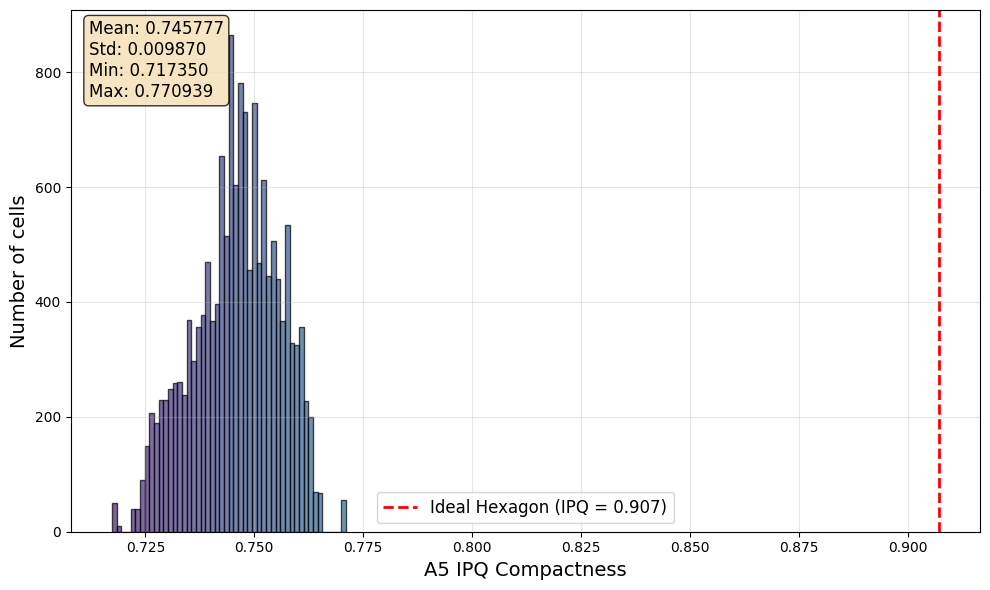

In [17]:
from vgrid.stats.a5stats import a5_compactness_ipq_hist
a5_compactness_ipq_hist(a5_inspect)

### Distribution of A5 IPQ Compactness

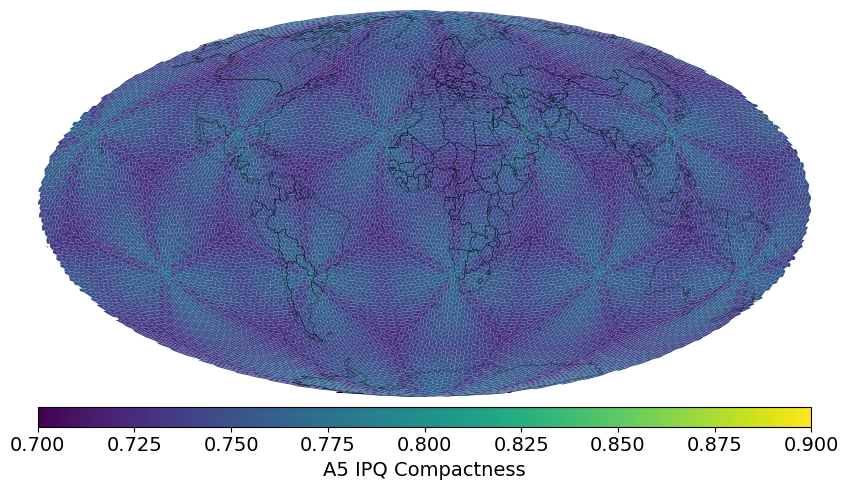

In [18]:
from vgrid.stats.a5stats import a5_compactness_ipq
a5_compactness_ipq(a5_inspect)

### A5 Convex hull Compactness Histogram:

$$C_{CVH} = \frac{A}{A_{CVH}}$$


The range of the convex hull compactness metric is [0,1]. 

As shapes become more concave, their convex hull compactness decreases toward 0.

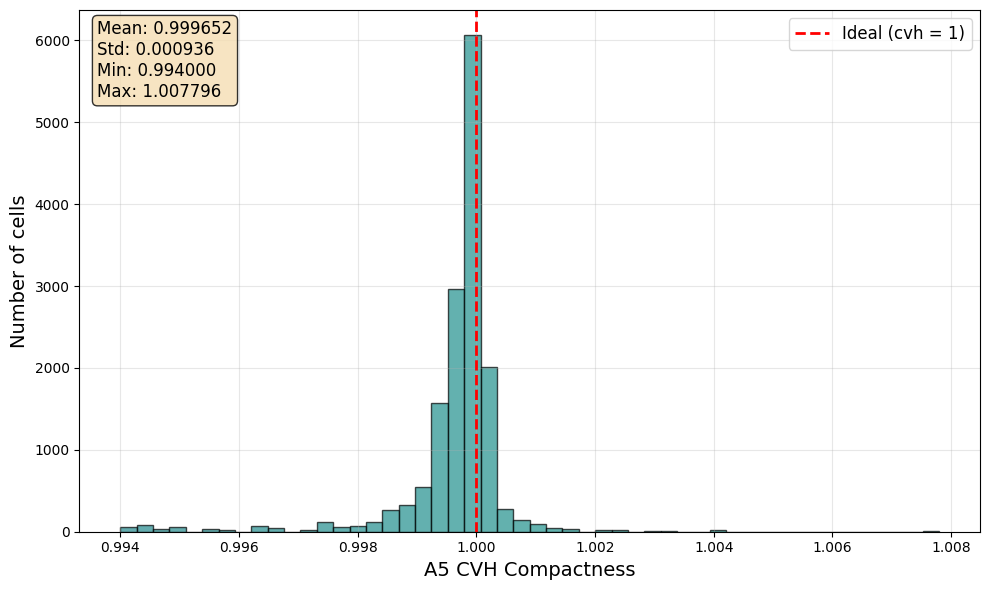

In [19]:
from vgrid.stats.a5stats import a5_compactness_cvh_hist
a5_compactness_cvh_hist(a5_inspect)

### Distribution of A5 Convex hull Compactness

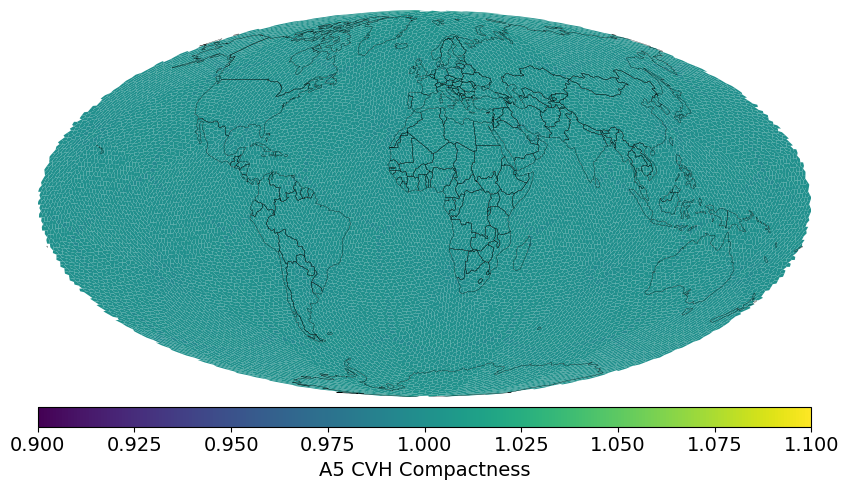

In [20]:
from vgrid.stats.a5stats import a5_compactness_cvh
a5_compactness_cvh(a5_inspect)

### A5 Statistics

Characteristic Length Scale (CLS - suggested by Ralph Kahn): the diameter of a spherical cap of the same cell's area

In [21]:
from vgrid.stats.a5stats import a5stats
a5stats('km')

resolution      number_of_cells  avg_edge_len_km  avg_cell_area_km2  \
0            0                   12      4970.475286       4.250547e+07   
1            1                   60      2222.864124       8.501094e+06   
2            2                  240      1111.432062       2.125273e+06   
3            3                  960       555.716031       5.313184e+05   
4            4                 3840       277.858015       1.328296e+05   
5            5                15360       138.929008       3.320740e+04   
6            6                61440        69.464504       8.301849e+03   
7            7               245760        34.732252       2.075462e+03   
8            8               983040        17.366126       5.188656e+02   
9            9              3932160         8.683063       1.297164e+02   
10          10             15728640         4.341531       3.242910e+01   
11          11             62914560         2.170766       8.107275e+00   
12          12            251658240         1.085383       2.026819e+00   
13          13           1006632960         0.542691       5.067047e-01   
14          14           4026531840         0.271346       1.266762e-01   
15          15          16106127360         0.135673       3.166904e-02   
16          16          64424509440         0.067836       7.917261e-03   
17          17         257698037760         0.033918       1.979315e-03   
18          18        1030792151040         0.016959       4.948288e-04   
19          19        4123168604160         0.008480       1.237072e-04   
20          20       16492674416640         0.004240       3.092680e-05   
21          21       65970697666560         0.002120       7.731700e-06   
22          22      263882790666240         0.001060       1.932925e-06   
23          23     1055531162664960         0.000530       4.832312e-07   
24          24     4222124650659840         0.000265       1.208078e-07   
25          25    16888498602639360         0.000132       3.020195e-08   
26          26    67553994410557440         0.000066       7.550488e-09   
27          27   270215977642229760         0.000033       1.887622e-09   
28          28  1080863910568919040         0.000017       4.719055e-10   
29          29  4323455642275676160         0.000008       1.179764e-10   

         cls_km  
0   7462.813629  
1   3299.182017  
2   1646.131485  
3    822.636354  
4    411.264598  
5    205.625604  
6    102.811965  
7     51.405878  
8     25.702926  
9     12.851461  
10     6.425730  
11     3.212865  
12     1.606433  
13     0.803216  
14     0.401608  
15     0.200804  
16     0.100402  
17     0.050201  
18     0.025101  
19     0.012550  
20     0.006275  
21     0.003138  
22     0.001569  
23     0.000784  
24     0.000392  
25     0.000196  
26     0.000098  
27     0.000049  
28     0.000025  
29     0.000012